#**Archisha Sinha**
##Course: Machine Learning
##Title: Multiple Linear Regression

#TASK 1

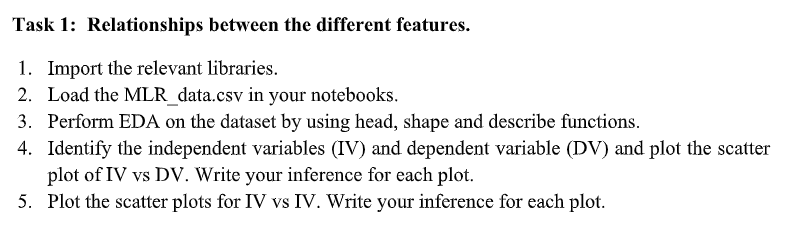

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
#Read the MLR_data.csv file into a DataFrame.
data_frame= pd.read_csv("MLR_data.csv") #Reading the file

In [123]:
#Explore size, shape, data types of each column in the dataset.
data_frame.shape

(24, 5)

In [124]:
data_frame.size

120

In [125]:
#List down the columns of dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24 non-null     int64  
 1   Month              24 non-null     int64  
 2   Interest_Rate      24 non-null     float64
 3   Unemployment_Rate  24 non-null     float64
 4   Stock_Index_Price  24 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.1 KB


In [126]:
data_frame.head(5)

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [127]:
data_frame.describe()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
count,24.000000,24.000000,24.000000,24.00000,24.000000
mean,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,0.510754,3.526299,0.349527,0.33002,210.735341
min,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,2017.000000,12.000000,2.750000,6.20000,1464.000000


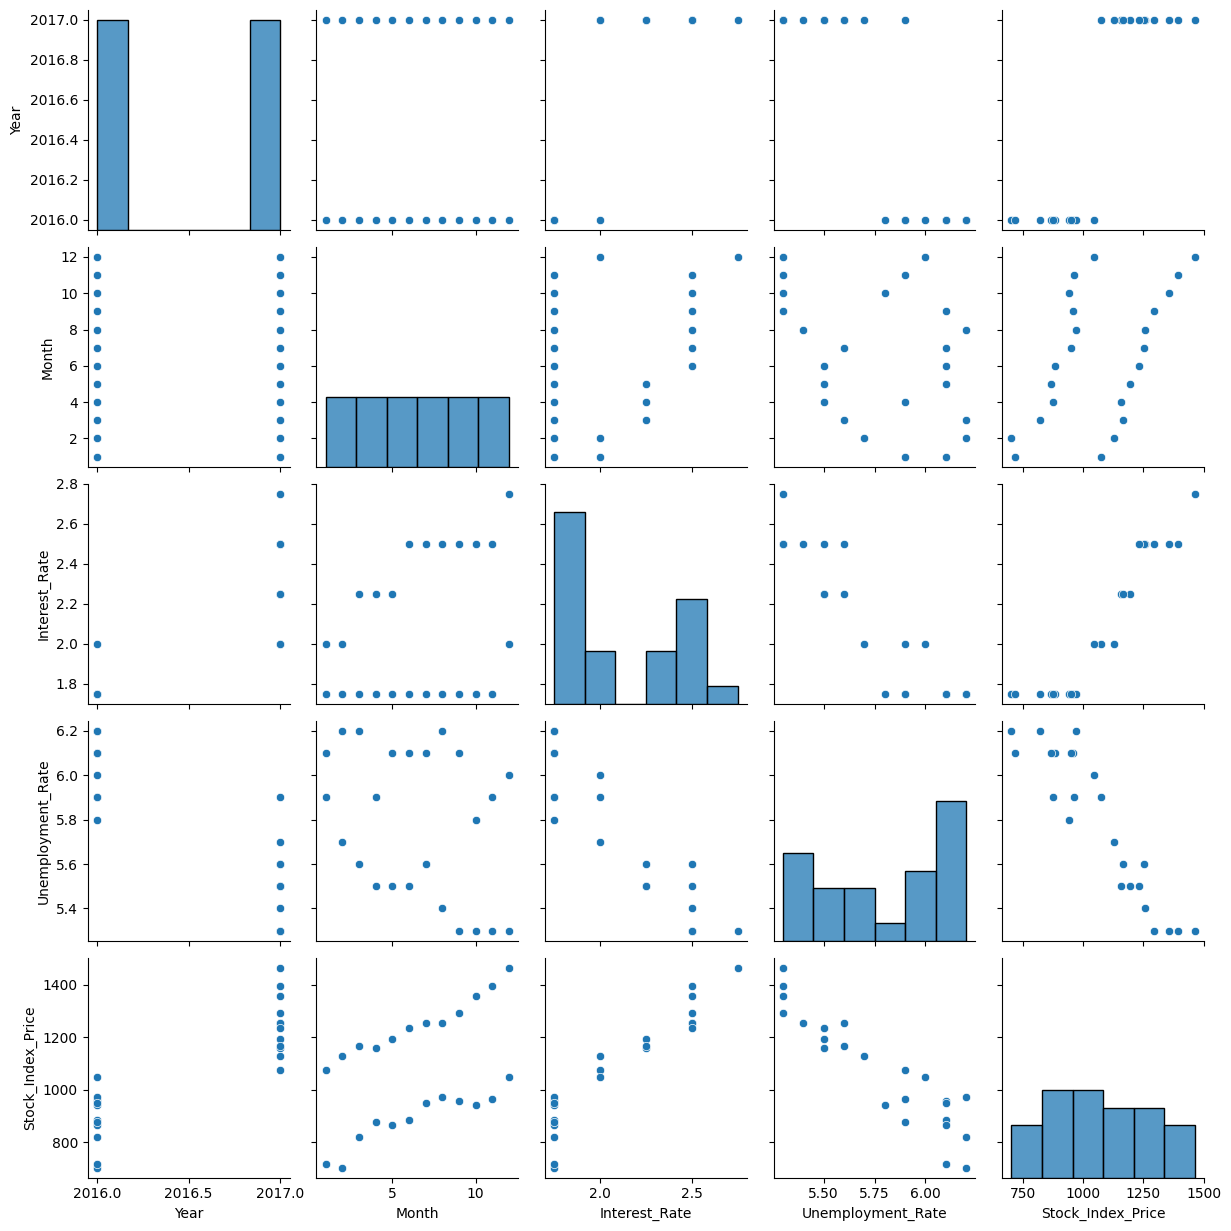

In [128]:
sns.pairplot(data_frame, diag_kind="hist")

#Inference: As the Interest rate is increasing, we can observe that Stocl Index Price is also increasing

Text(0, 0.5, 'Stock_Index_Price')

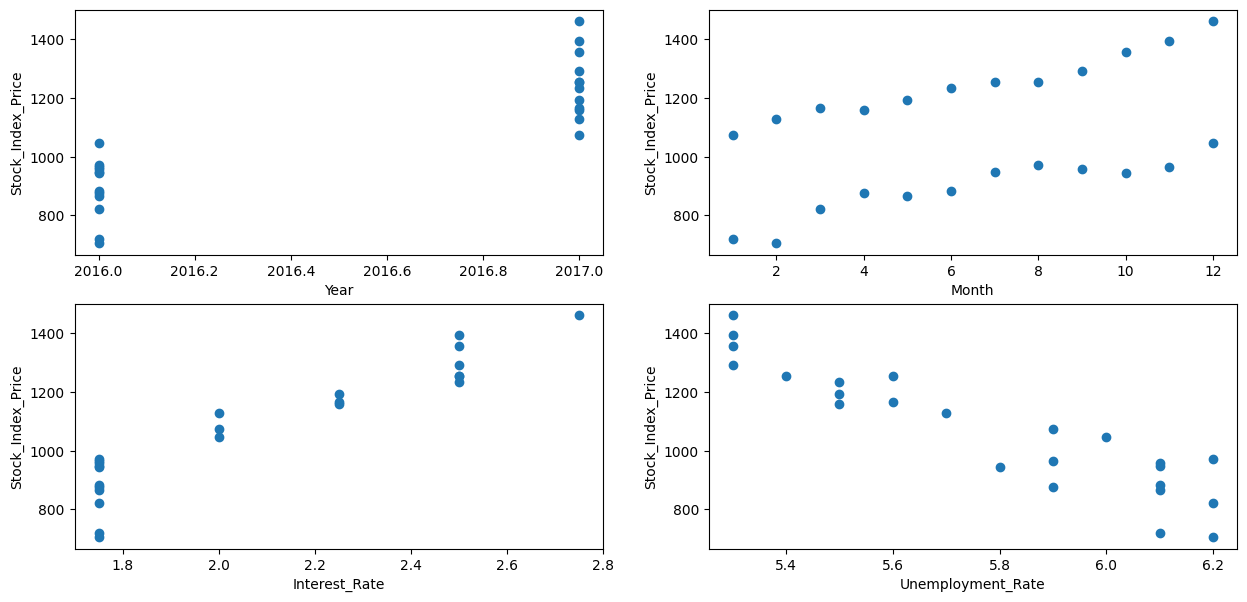

In [129]:
plt.figure(figsize=(15,7))

Dep_Var= data_frame["Stock_Index_Price"]
Ind_Var1= data_frame["Year"]
Ind_Var2= data_frame["Month"]
Ind_Var3= data_frame["Interest_Rate"]
Ind_Var4= data_frame["Unemployment_Rate"]

plt.subplot(2,2,1)
plt.scatter(Ind_Var1, Dep_Var )
plt.xlabel("Year")
plt.ylabel("Stock_Index_Price")

plt.subplot(2,2,2)
plt.scatter(Ind_Var2, Dep_Var )
plt.xlabel("Month")
plt.ylabel("Stock_Index_Price")

plt.subplot(2,2,3)
plt.scatter(Ind_Var3, Dep_Var )
plt.xlabel("Interest_Rate")
plt.ylabel("Stock_Index_Price")

plt.subplot(2,2,4)
plt.scatter(Ind_Var4, Dep_Var )
plt.xlabel("Unemployment_Rate")
plt.ylabel("Stock_Index_Price")

Inference:

1. Month vs Stock Index Price: Positive
2. Interest vs Stock Index Price: Positive
3. Unemployment vs Stock Index Price: Negative

Text(0, 0.5, 'Unemployment_Rate')

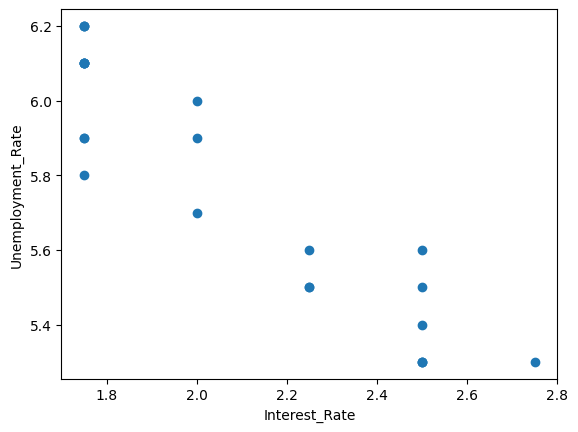

In [130]:
plt.scatter(Ind_Var3, Ind_Var4)
plt.xlabel("Interest_Rate")
plt.ylabel("Unemployment_Rate")

#TASK 2

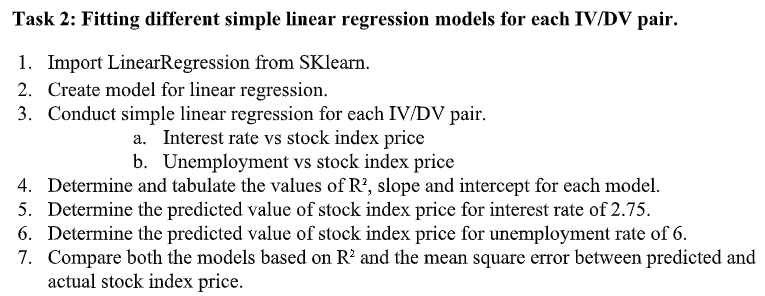

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [132]:
y= data_frame["Stock_Index_Price"].values.reshape(-1,1)
x1=data_frame["Interest_Rate"].values.reshape(-1,1)
x2=data_frame["Unemployment_Rate"].values.reshape(-1,1)

# print(y)
# print(x1)
# print(x2)

LINEAR REGRESSION FOR **INTEREST RATE V/S STOCK PRICE**

where Interest rate is Independent Variable and Stock Index Price is Dependent Variable

In [133]:
#creating train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=32)

INTEREST RATE

In [134]:
reg= LinearRegression().fit(x1,y)

In [135]:
reg.score(x1,y)  # R2

0.8757089547891359

In [136]:
reg.intercept_

array([-99.46431881])

In [137]:
reg.coef_

array([[564.20389249]])

In [138]:
reg.score(x1,y)

0.8757089547891359

In [139]:
reg.predict([[2.75]])

array([[1452.09638554]])

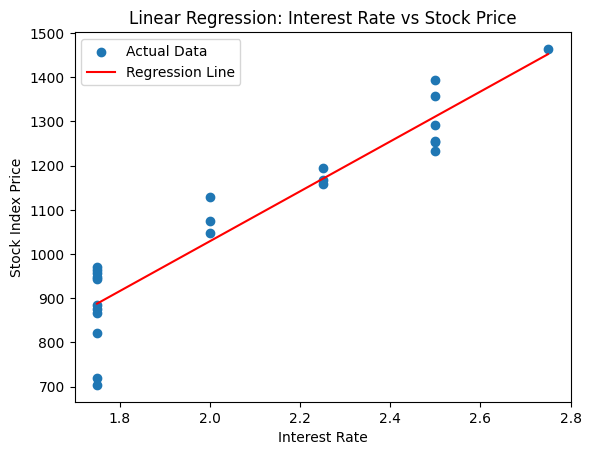

In [140]:
# Predicting values for the regression line
y_pred = reg.predict(x1)

# Visualizing the scatter plot
plt.scatter(x1, y, label='Actual Data')
plt.plot(x1, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Interest Rate vs Stock Price')
plt.xlabel('Interest Rate')
plt.ylabel('Stock Index Price')
plt.legend()
plt.show()

<Axes: >

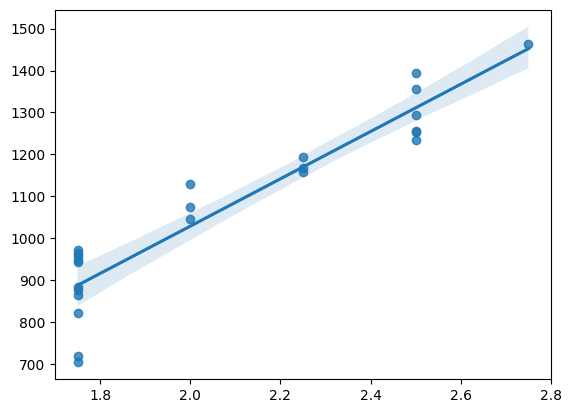

In [141]:
sns.regplot(x=x1, y=y)

LINEAR REGRESSION FOR **UNEMPLOYMENT RATE V/S STOCK PRICE**

where Unemployment rate is Independent Variable and Stock Index Price is Dependent Variable


In [142]:
reg= LinearRegression().fit(x2,y)
reg.score(x2,y)   # R2

0.850706607677214

In [143]:
reg.intercept_

array([4471.33932136])

In [144]:
reg.coef_

array([[-588.96207585]])

In [145]:
reg.predict([[6]])

array([[937.56686627]])

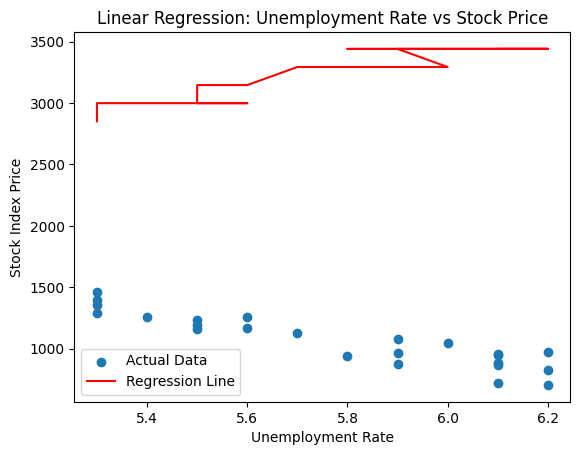

In [146]:
# Predicting values for the regression line
y_pred = reg.predict(x1)

# Visualizing the scatter plot
plt.scatter(x2, y, label='Actual Data')
plt.plot(x2, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Unemployment Rate vs Stock Price')
plt.xlabel('Unemployment Rate')
plt.ylabel('Stock Index Price')
plt.legend()
plt.show()

<Axes: >

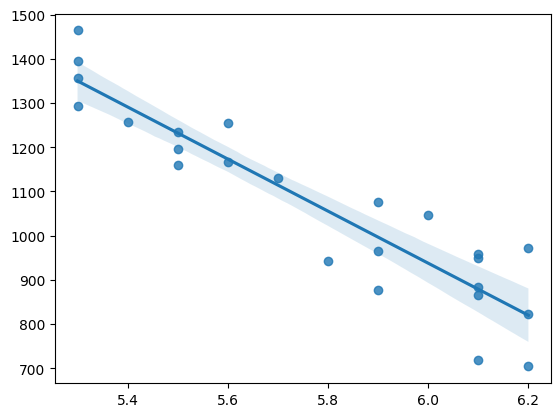

In [147]:
sns.regplot(x=x2,y=y)

#TASK 3

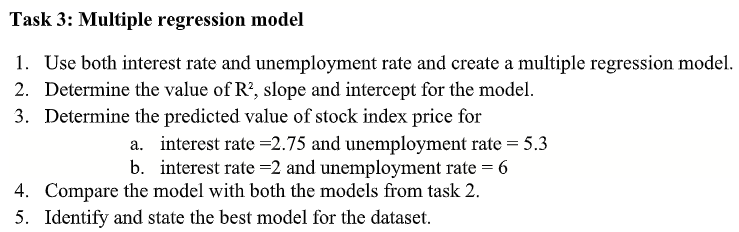

In [148]:
y= data_frame["Stock_Index_Price"]
X=data_frame.drop(["Year","Month","Stock_Index_Price"],axis=1)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [150]:
reg= LinearRegression().fit(X,y)

In [151]:
reg.intercept_

1798.4039776258544

In [152]:
reg.coef_

array([ 345.54008701, -250.14657137])

In [153]:
from sklearn.metrics import r2_score

In [154]:
predictions= reg.predict(X_test)

In [155]:
r2_score(y_test,predictions)

0.9127758823366776

In [156]:
reg.score(X,y) #R2

0.8976335894170216

In [157]:
reg.predict([[2.75,5.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1422.86238865])

In [158]:
reg.predict([[2,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([988.60472343])

In [159]:
from sklearn.metrics import r2_score

MODEL WITH FEATURES

In [160]:
df=data_frame
X= df.drop(["Stock_Index_Price"],axis=1)
y= df["Stock_Index_Price"]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [162]:
reg= LinearRegression().fit(X,y)

In [163]:
reg.intercept_

-681638.0017816082

In [164]:
reg.coef_

array([338.26814287,  27.82395958,  71.92225193,  45.09618248])

In [165]:
predictions= reg.predict(X_test)

In [166]:
r2_score(y_test,predictions)

0.9798409521240173

In [167]:
reg.score(X,y) #R2

0.978297446705884

In [168]:
reg.predict([[2017,12,2.75,5.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1419.52585387])

#TASK 4

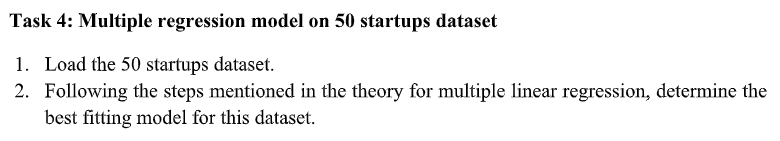

In [169]:
#Read the MLR_data.csv file into a DataFrame.
data_frame= pd.read_csv("50_Startups.csv") #Reading the file

In [170]:
data_frame.shape

(50, 5)

In [171]:
data_frame.size

250

In [172]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [173]:
data_frame.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


from matplotlib import pyplot as plt
_df_0['R&D Spend'].plot(kind='hist', bins=20, title='R&D Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Administration'].plot(kind='hist', bins=20, title='Administration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Marketing Spend'].plot(kind='hist', bins=20, title='Marketing Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Profit'].plot(kind='hist', bins=20, title='Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='R&D Spend', y='Administration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Administration', y='Marketing Spend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Marketing Spend', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['R&D Spend'].plot(kind='line', figsize=(8, 4), title='R&D Spend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Administration'].plot(kind='line', figsize=(8, 4), title='Administration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Marketing Spend'].plot(kind='line', figsize=(8, 4), title='Marketing Spend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='R&D Spend', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Administration', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Marketing Spend', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Profit', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [174]:
data_frame.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


No charts were generated by quickchart


In [175]:
data_frame.sum()

R&D Spend                                                 3686080.78
Administration                                            6067231.98
Marketing Spend                                          10551254.89
State              New YorkCaliforniaFloridaNew YorkFloridaNew Yo...
Profit                                                    5600631.96
dtype: object

In [176]:
data_frame.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [177]:
data_frame.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


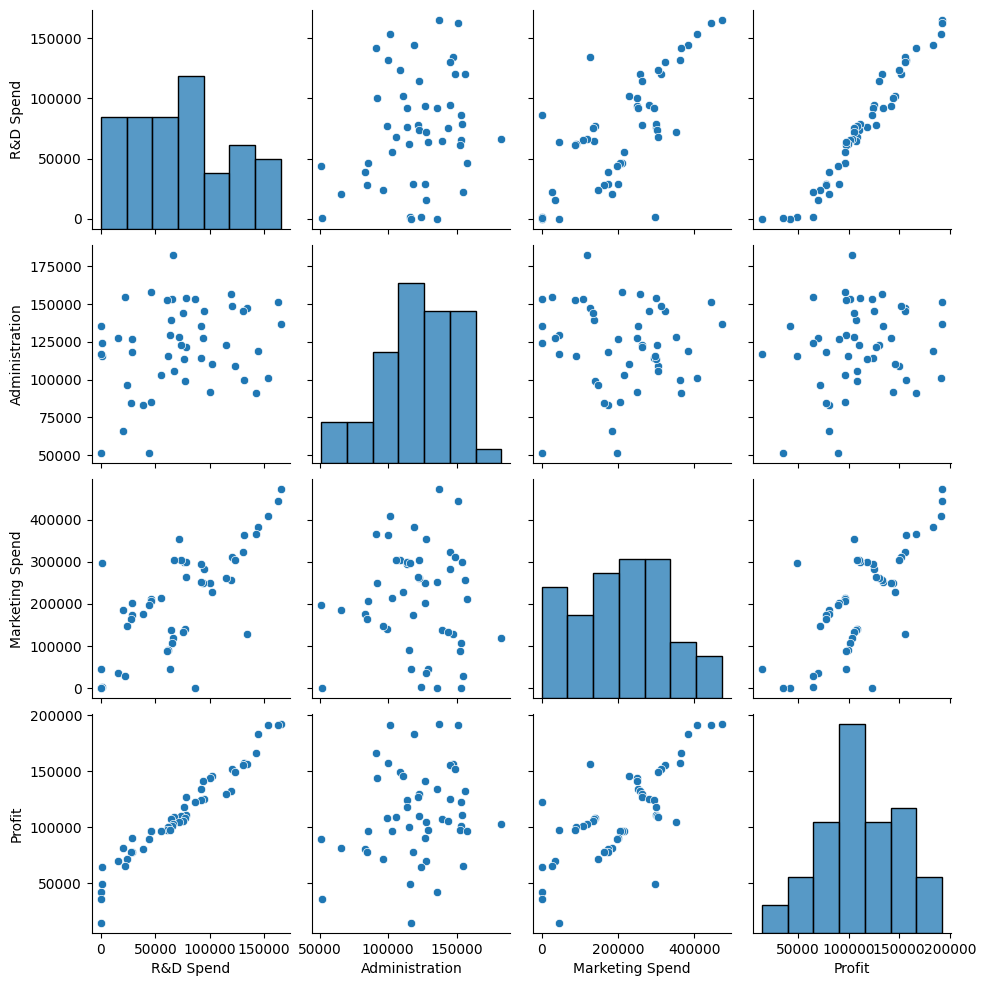

In [178]:
sns.pairplot(data_frame, diag_kind="hist")

In [179]:
df1= data_frame[["R&D Spend", "Administration", "Marketing Spend"]]

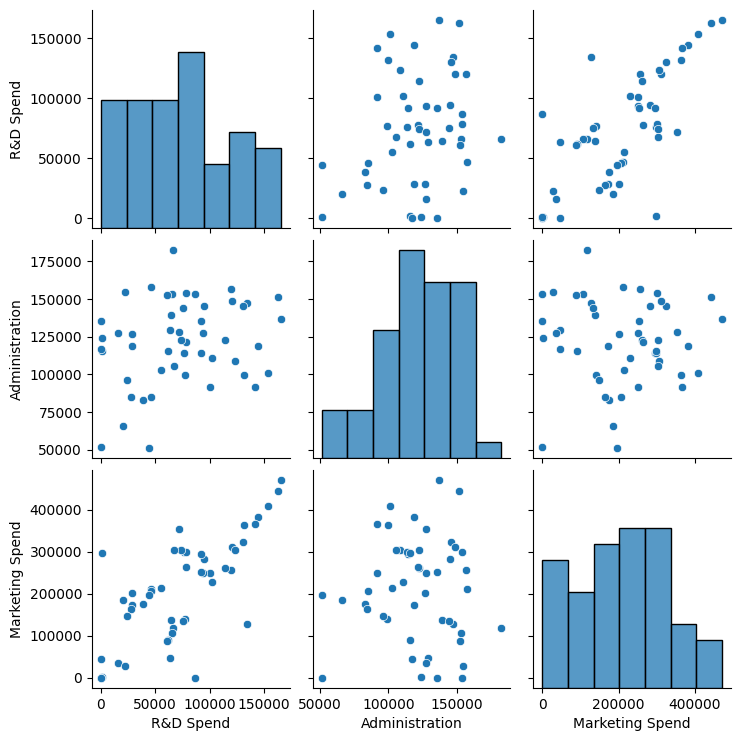

In [180]:
sns.pairplot(df1, diag_kind="hist")
# R&D vs Market: positive association
# Administration vs R&D: No association
# Administration vs Market: No association

In [205]:
df=data_frame
y= df["Profit"].values.reshape(-1,1)
x1=df["R&D Spend"].values.reshape(-1,1)
x2=df["Marketing Spend"].values.reshape(-1,1)
x3=df["Administration"].values.reshape(-1,1)

SIMPLE LINEAR REGRESSION ON **R&D SPEND V/S PROFIT**

where R&D Spend is Independent Variable and Profit is Dependent Variable

In [207]:
#Conducting SLR on y and x1
X_train, X_test, y_train, y_test= train_test_split(x1, y, test_size=0.3, random_state=42)

In [208]:
reg= LinearRegression().fit(x1,y)

In [209]:
reg.score(x1,y)

0.9465353160804393

In [210]:
reg.intercept_

array([49032.89914125])

In [211]:
reg.coef_

array([[0.85429137]])

<Axes: >

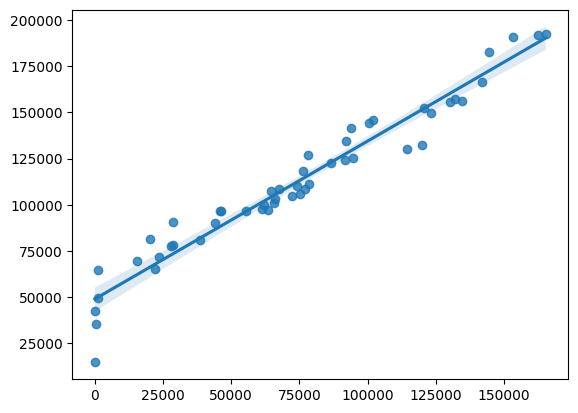

In [212]:
sns.regplot(x=x1,y=y)

SIMPLE LINEAR REGRESSION ON **MARKETING SPEND V/S PROFIT**

where Marketing Spend is Independent Variable and Profit is Dependent Variable

In [213]:
#Conductinf SLR on y and x2
X_train, X_test, y_train, y_test= train_test_split(x2, y, test_size=0.3, random_state=42)

In [214]:
reg= LinearRegression().fit(x2,y)

In [215]:
reg.score(x2,y)

0.5591535746115515

In [216]:
reg.intercept_

array([60003.54881577])

In [217]:
reg.coef_

array([[0.24645926]])

<Axes: >

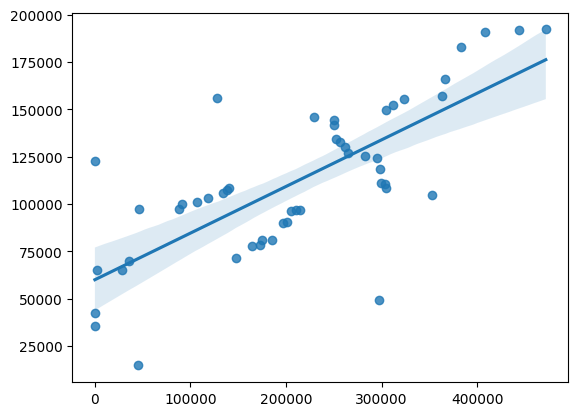

In [218]:
sns.regplot(x=x2,y=y)

In [219]:
y= data_frame["Profit"]
X=data_frame.drop(["Profit", "State"],axis=1)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [221]:
reg1= LinearRegression().fit(X,y)

In [222]:
reg.intercept_

array([60003.54881577])

In [223]:
reg.coef_

array([[0.24645926]])

Relationship between independent variable = R&Dspend dependent variable= profit

<Axes: xlabel='R&D Spend'>

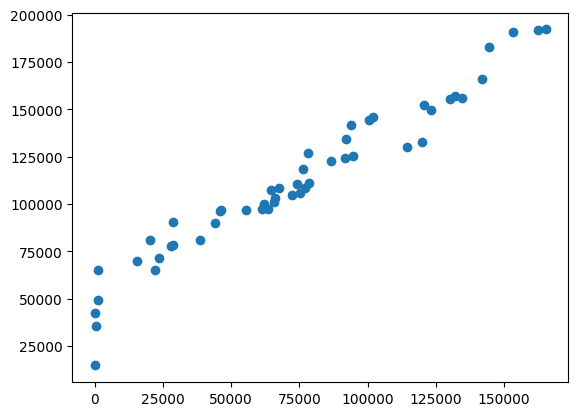

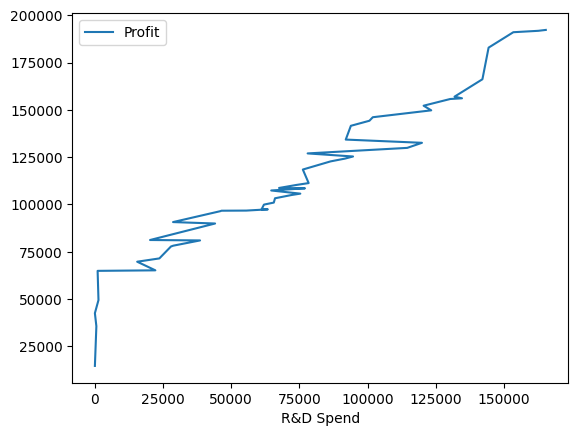

In [224]:
plt.scatter(x1,y)
data_frame.plot(x = 'R&D Spend', y = 'Profit')

Relationship between independent variable = Administration ,dependent variable= profit

<Axes: xlabel='Administration'>

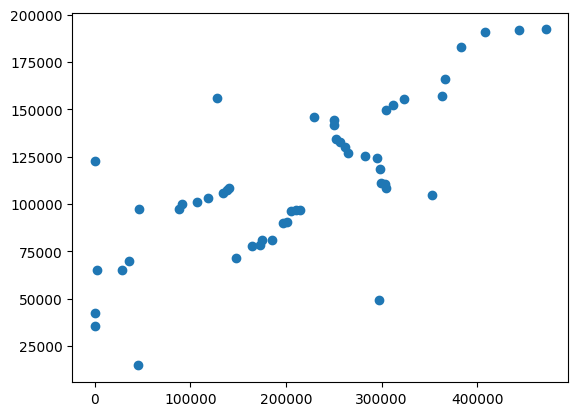

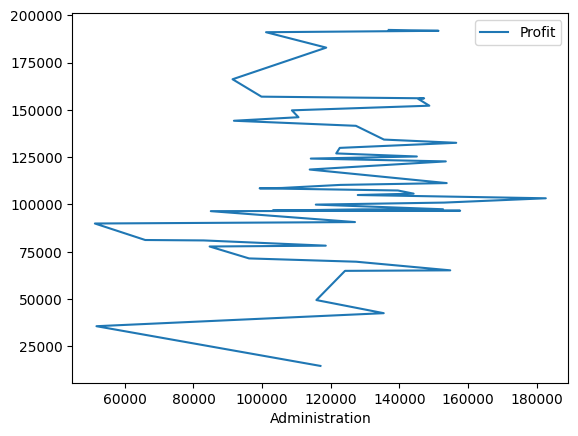

In [225]:
plt.scatter(x2,y)
data_frame.plot(x = 'Administration', y = 'Profit')

Relationship between independent variable = Marketing Spend ,dependent variable= profit

<Axes: xlabel='Marketing Spend'>

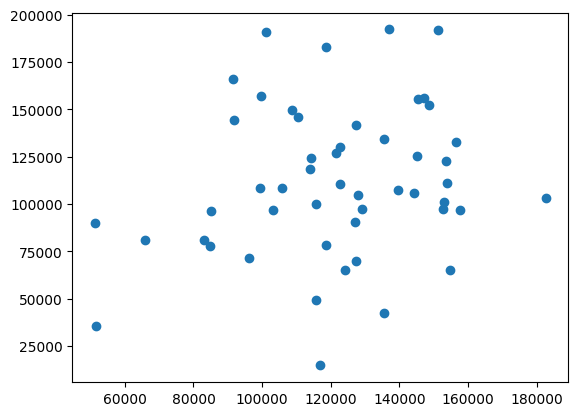

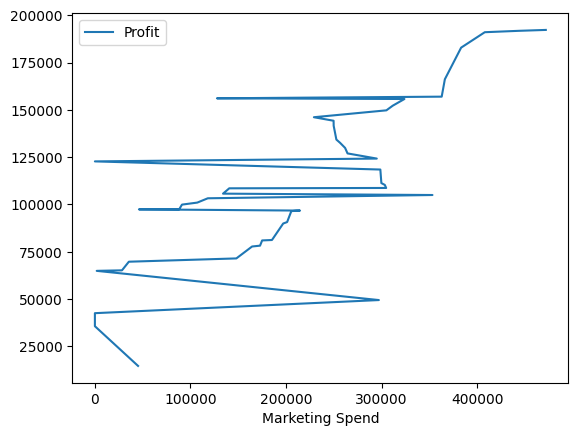

In [226]:
plt.scatter(x3,y)
data_frame.plot(x = 'Marketing Spend', y = 'Profit')

<Axes: xlabel='R&D Spend'>

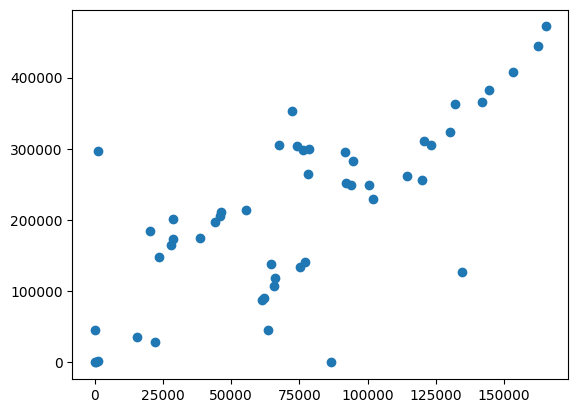

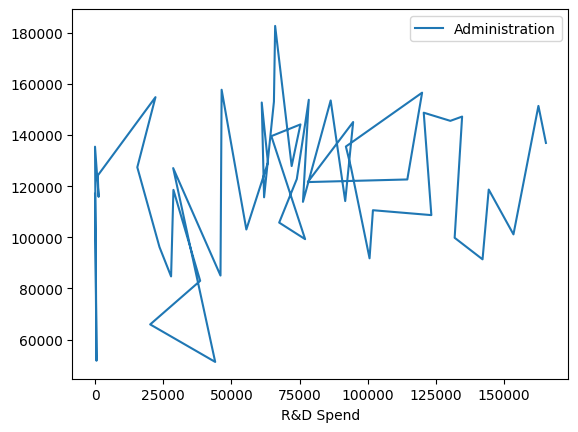

In [227]:
plt.scatter(x1,x2)
data_frame.plot(x = 'R&D Spend', y = 'Administration')

<Axes: xlabel='R&D Spend'>

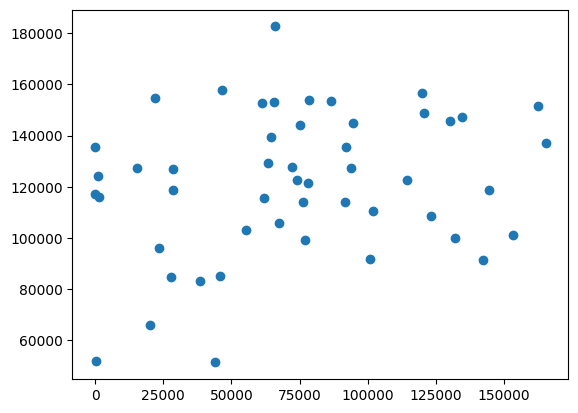

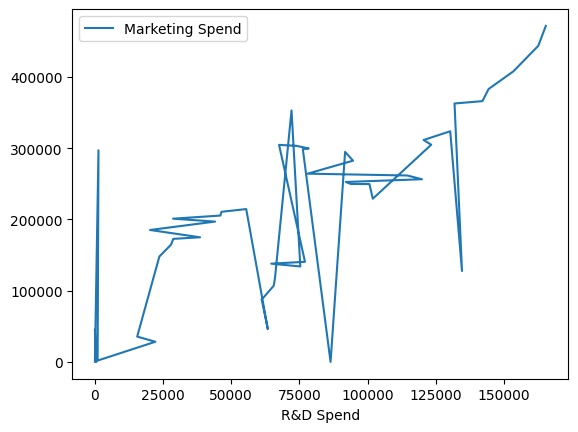

In [228]:
plt.scatter(x1,x3)
data_frame.plot(x = 'R&D Spend', y = 'Marketing Spend')

<Axes: xlabel='Administration'>

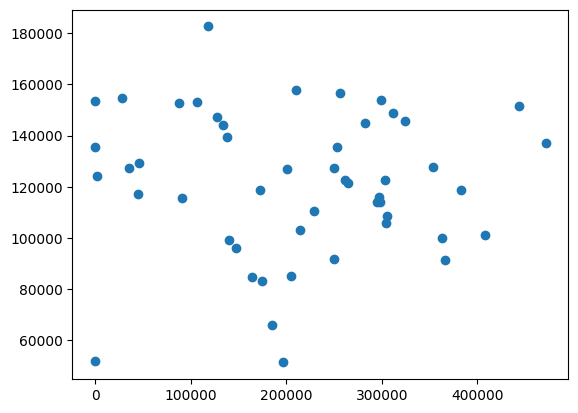

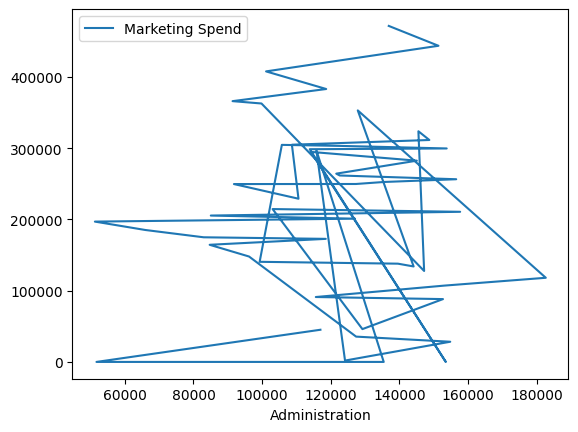

In [229]:
plt.scatter(x2,x3)
data_frame.plot(x = 'Administration', y = 'Marketing Spend')

In [230]:
from sklearn.linear_model import LinearRegression

In [231]:
y = data_frame['Profit']
x1 = data_frame['R&D Spend']
x2 = data_frame['Administration']
x3 = data_frame['Marketing Spend']

In [232]:
A = x1[:, np.newaxis]
print(A)
R = y[:, np.newaxis]
print(R)

[[165349.2 ]
 [162597.7 ]
 [153441.51]
 [144372.41]
 [142107.34]
 [131876.9 ]
 [134615.46]
 [130298.13]
 [120542.52]
 [123334.88]
 [101913.08]
 [100671.96]
 [ 93863.75]
 [ 91992.39]
 [119943.24]
 [114523.61]
 [ 78013.11]
 [ 94657.16]
 [ 91749.16]
 [ 86419.7 ]
 [ 76253.86]
 [ 78389.47]
 [ 73994.56]
 [ 67532.53]
 [ 77044.01]
 [ 64664.71]
 [ 75328.87]
 [ 72107.6 ]
 [ 66051.52]
 [ 65605.48]
 [ 61994.48]
 [ 61136.38]
 [ 63408.86]
 [ 55493.95]
 [ 46426.07]
 [ 46014.02]
 [ 28663.76]
 [ 44069.95]
 [ 20229.59]
 [ 38558.51]
 [ 28754.33]
 [ 27892.92]
 [ 23640.93]
 [ 15505.73]
 [ 22177.74]
 [  1000.23]
 [  1315.46]
 [     0.  ]
 [   542.05]
 [     0.  ]]
[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]
 [156991.12]
 [156122.51]
 [155752.6 ]
 [152211.77]
 [149759.96]
 [146121.95]
 [144259.4 ]
 [141585.52]
 [134307.35]
 [132602.65]
 [129917.04]
 [126992.93]
 [125370.37]
 [124266.9 ]
 [122776.86]
 [118474.03]
 [111313.02]
 [110352.25]
 [108733.99]
 [108552.04]
 [107404.34]
 [105733.54

<ipython-input-232-bfecff3a5a54>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  A = x1[:, np.newaxis]
<ipython-input-232-bfecff3a5a54>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R = y[:, np.newaxis]
